<a href="https://colab.research.google.com/github/AbhijeetBeedikar/Gamblers-Problem/blob/main/Gambler's_Problem_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Streaming output truncated to the last 5000 lines.
[0, 0.025109161201455937, 0.025109161201455937, 0.05819784528855519, 0.05819784528855519, 0.052378060759699675, 0.09576534505549839, 0.09576534505549839, 0.13560570398588084, 0.13560570398588084, 0.12564746138542787, 0.1359907033942842, 0.1359907033942842, 0.1359907033942842, 0.1359907033942842, 0.22702819705183616, 0.25657592372822, 0.25657592372822, 0.23549821768374438, 0.28993477714565874, 0.28993477714565874, 0.25657592372822, 0.31283948540460493, 0.319013326262474, 0.34232026012751415, 0.31283948540460493, 0.47618903037984983, 0.42857012734186484, 0.47618903037984983, 0.47618903037984983, 0.5107856776979232, 0.48946665864725053, 0.5107856776979232, 0.5654591656776989, 0.5654591656776989, 0.5221734745580274, 0.5907777684320722, 0.5907777684320722, 0.6575846051432949, 0.660686735421805, 0.660686735421805, 0.6799601550571409, 0.7044566245549645, 0.6849780635511125, 0.7044566245549645, 0.7473090309398123, 0.7670054810497341, 0.7670054

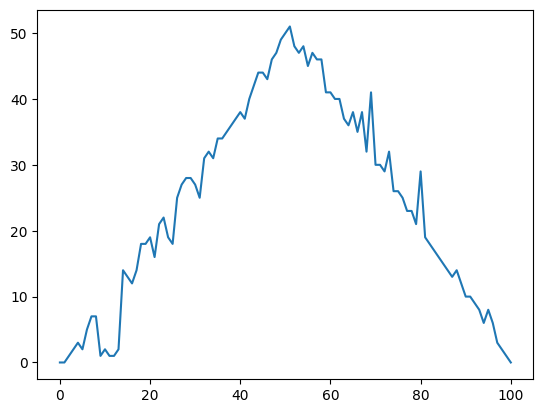

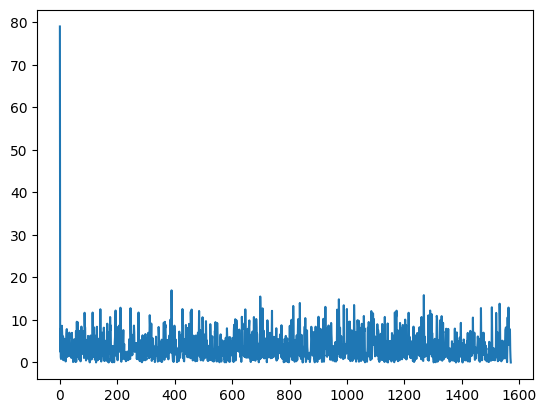

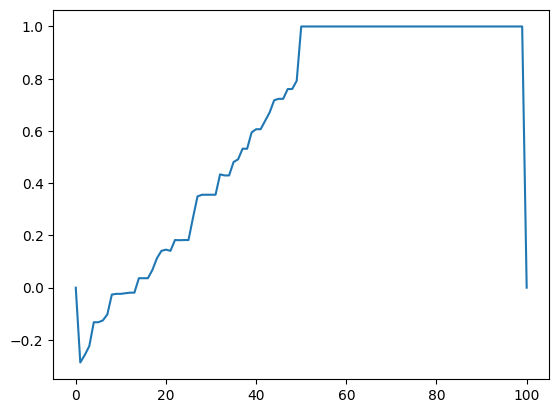

In [1]:
import numpy as np
V = list(map(int,list(np.zeros(101))))
P = list(map(int,list(np.zeros(101))))
gamma = 0.9
PrH = 0.5

def is_terminal(state):
  if state >= 100:
    return 1
  elif state <= 0:
    return -1
  return 0

def step(state,action):
  ''' returns the new state and the reward received by the agent after taking the action from the current state
  '''
  state = state + action*int(np.random.choice([1,-1], p = [PrH,1-PrH])) #return from the bet
  if is_terminal(state) == 0:
    return state, 0 #ns, r
  elif is_terminal(state) == 1:
    return 100, 1
  else:
    return 0, -1

def TPI(value,policy,k = 5):
  for i in range(k):
    for state in range(101):
      action = policy[state]
      if is_terminal(state) != 0:
        continue
      term1 = 0
      term2 = 0
      if state*2 >= 100:
        term1 = 0.5*(1 + gamma*value[100])
      else:
        term1 = 0.5*(gamma*value[2*state])
      if state - policy[state] == 0:
        term2 = 0.5*(-1 + gamma*value[0])
      else:
        term2 = 0.5*(gamma*value[state - policy[state]])
      value[state] = term1 + term2

  is_optimal = True
  for state in range(101):
    if is_terminal(state) != 0:
      continue
    action_values = []
    for possible_actions in range(0,state+1):
      new_state, reward = step(state,possible_actions)
      action_values.append(reward + gamma*value[new_state])
    if policy[state] != int(np.argmax(action_values)):
      is_optimal = False
    policy[state] = int(np.argmax(action_values))
    value[state] = float(np.max(action_values))
  return value, policy, is_optimal
improvement = []
iteration = 0
while iteration <= 2000:
  iteration +=1
  v_old = V.copy()
  V,P,optimal = TPI(V,P)
  improvement.append(abs(float(sum(np.array(v_old)-np.array(V)))))
  print(f"Iteration {iteration}: {improvement[-1]}")
  print(V)
  print(P)
  print()

  if optimal:
    break
  if improvement[-1] < 0.005:
    print("not much improvement in new value function",str(improvement[-1]))
    break

import matplotlib.pyplot as plt
plt.plot(np.array(P))
plt.show()
plt.plot(improvement)
plt.show()
plt.plot(np.array(V))
plt.show()